# 0. Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as mp
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# 1. Đọc file excel

In [2]:
df = pd.read_excel("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/08185826/house_price_do%CC%82%CC%81ng-da.xlsx")
df.head()

C:\Users\PHAM THE ANH\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

# 2. Phát hiện các dòng và cột chứa dữ liệu khuyết thiếu

- Các thuộc tính chứa dữ liệu khuyết thiếu bao gồm:</br>
"area", "price", "land_certificate", "house_direction", "balcony_direction", "toilet", "bedroom", "floor", "streetname",</br>
"ward_name"

In [4]:
na = df.isna()

In [5]:
na

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False
997,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False
998,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False


In [6]:
# Tìm các hàng có chứa dữ liệu rỗng
conditions = na.area | na.price | na.land_certificate | na.house_direction | na.balcony_direction | na.toilet | na.bedroom | na.floor | na.street_name | na.ward_name
df[conditions]

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230
5,"Bán gấp mặt phố Chùa Bộc, Đống Đa, thang máy, ...","Phố Chùa Bộc, Phường Quang Trung, Đống Đa, Hà Nội",41.0,13500.0,2021-04-04,Sổ đỏ,NaN,NaN,5.0,3.0,6.0,Bán nhà mặt phố\n,Phố Chùa Bộc,Phường Quang Trung,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230
6,Bán nhà mặt phố Hoàng Cầu - Mai Anh Tuấn. Đối ...,"Phố Hoàng Cầu, Phường Láng Hạ, Đống Đa, Hà Nội",50.0,13000.0,2021-04-06,Sổ đỏ,NaN,NaN,5.0,4.0,5.0,Bán nhà mặt phố\n,Phố Hoàng Cầu,Phường Láng Hạ,Quận Đống Đa,Thành phố Hà Nội,21.014612,105.819296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Bán nhà mặt phố Yên Lãng, Đống Đa, 65m2, 5T, 1...","Đường Yên Lãng, Phường Láng Hạ, Đống Đa, Hà...",65.0,17500.0,2021-05-09,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Đường Yên Lãng,Phường Láng Hạ,Quận Đống Đa,Thành phố Hà Nội,21.011495,105.816666
996,"Bán nhà 5 tầng đep MP Yên Lãng giá rẻ, DT 60m2...","Đường Yên Lãng, Phường Trung Liệt, Đống Đa, ...",60.0,17500.0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.011495,105.816666
997,MẶT PHỐ XÃ ĐÀN - KINH DOANH ĐỈNH CAO - 6 TẦNG ...,"Phố Xã Đàn, Phường Ô Chợ Dừa, Đống Đa, Hà Nội",45.0,24800.0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Bán nhà mặt phố\n,Đường Ô Chợ Dừa,Phường Ô Chợ Dừa,Quận Đống Đa,Thành phố Hà Nội,21.016106,105.832157
998,"Bán nhà mặt hồ Văn Chương, Đống Đa 33m2, 6 tần...","Hồ Văn Chương, Phường Văn Chương, Quận Đống Đa...",178.0,8100.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,3.0,NaN,Bán nhà riêng,Đường Hồ Văn Chương,Phường Văn Chương,Quận Đống Đa,Thành phố Hà Nội,21.021345,105.833122


# 3. Xoá bỏ hết các dòng dữ liệu không có thông tin về giá

In [7]:
df.dropna(subset = ["price", "area"], inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              942 non-null    object        
 1   address            942 non-null    object        
 2   area               942 non-null    float64       
 3   price              942 non-null    float64       
 4   postDate           942 non-null    datetime64[ns]
 5   land_certificate   683 non-null    object        
 6   house_direction    43 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             548 non-null    float64       
 9   bedroom            631 non-null    float64       
 10  floor              367 non-null    float64       
 11  type_of_land       942 non-null    object        
 12  street_name        789 non-null    object        
 13  ward_name          787 non-null    object        
 14  district_n

# 4. Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”, house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó

In [9]:
values = {"land_certificate":"Unknown",
          "house_direction": df.house_direction.mode()[0],
          "balcony_direction": df.balcony_direction.mode()[0],
          "toilet": df.toilet.mode()[0],
          "bedroom": df.bedroom.mode()[0],
          "floor": df.floor.mode()[0],
          "street_name": df.street_name.mode()[0],
          "ward_name": df.ward_name.mode()[0]
         }
df.fillna(value = values, inplace = True)

In [10]:
df

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,4.0,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Bán nhà mặt phố Yên Lãng, Đống Đa, 65m2, 5T, 1...","Đường Yên Lãng, Phường Láng Hạ, Đống Đa, Hà...",65.0,17500.0,2021-05-09,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,6.0,5.0,Bán nhà mặt phố\n,Đường Yên Lãng,Phường Láng Hạ,Quận Đống Đa,Thành phố Hà Nội,21.011495,105.816666
996,"Bán nhà 5 tầng đep MP Yên Lãng giá rẻ, DT 60m2...","Đường Yên Lãng, Phường Trung Liệt, Đống Đa, ...",60.0,17500.0,2021-01-01,Unknown,Đông-Nam,Đông-Nam,4.0,4.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.011495,105.816666
997,MẶT PHỐ XÃ ĐÀN - KINH DOANH ĐỈNH CAO - 6 TẦNG ...,"Phố Xã Đàn, Phường Ô Chợ Dừa, Đống Đa, Hà Nội",45.0,24800.0,2021-01-01,Unknown,Đông-Nam,Đông-Nam,4.0,4.0,5.0,Bán nhà mặt phố\n,Đường Ô Chợ Dừa,Phường Ô Chợ Dừa,Quận Đống Đa,Thành phố Hà Nội,21.016106,105.832157
998,"Bán nhà mặt hồ Văn Chương, Đống Đa 33m2, 6 tần...","Hồ Văn Chương, Phường Văn Chương, Quận Đống Đa...",178.0,8100.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,3.0,5.0,Bán nhà riêng,Đường Hồ Văn Chương,Phường Văn Chương,Quận Đống Đa,Thành phố Hà Nội,21.021345,105.833122


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              942 non-null    object        
 1   address            942 non-null    object        
 2   area               942 non-null    float64       
 3   price              942 non-null    float64       
 4   postDate           942 non-null    datetime64[ns]
 5   land_certificate   942 non-null    object        
 6   house_direction    942 non-null    object        
 7   balcony_direction  942 non-null    object        
 8   toilet             942 non-null    float64       
 9   bedroom            942 non-null    float64       
 10  floor              942 non-null    float64       
 11  type_of_land       942 non-null    object        
 12  street_name        942 non-null    object        
 13  ward_name          942 non-null    object        
 14  district_n

# 5. Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ

In [12]:
df.type_of_land.unique()

array(['Bán nhà riêng\n ', 'Bán nhà mặt phố\n ', 'Tập thể, cư xá',
       'Bán nhà riêng', 'Bán nhà mặt phố', 'Chung cư',
       'Bất động sản khác', 'Bất động sản khác\n ', 'Đất thổ cư'],
      dtype=object)

In [13]:
df["type_of_land"].replace('Bán nhà riêng\n ', 'Bán nhà riêng', inplace = True)
df["type_of_land"].replace('Bán nhà mặt phố\n ', 'Bán nhà mặt phố', inplace = True)
df["type_of_land"].replace('Bất động sản khác\n ', 'Bất động sản khác', inplace = True)
df["type_of_land"].unique()

array(['Bán nhà riêng', 'Bán nhà mặt phố', 'Tập thể, cư xá', 'Chung cư',
       'Bất động sản khác', 'Đất thổ cư'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              942 non-null    object        
 1   address            942 non-null    object        
 2   area               942 non-null    float64       
 3   price              942 non-null    float64       
 4   postDate           942 non-null    datetime64[ns]
 5   land_certificate   942 non-null    object        
 6   house_direction    942 non-null    object        
 7   balcony_direction  942 non-null    object        
 8   toilet             942 non-null    float64       
 9   bedroom            942 non-null    float64       
 10  floor              942 non-null    float64       
 11  type_of_land       942 non-null    object        
 12  street_name        942 non-null    object        
 13  ward_name          942 non-null    object        
 14  district_n

In [15]:
s1 = df["address"].str.lower().str.strip()
s1

0      đường trần quang diệu, phường trung liệt, đốn...
1      đường tây sơn, phường trung liệt, đống đa, hà...
2      số 36 đoàn kết, phố khâm thiên, phường thổ qu...
3      ngõ 1194, đường láng, phường láng thượng, đố...
4       phố thái hà, phường trung liệt, đống đa, hà nội
                             ...                        
995    đường yên lãng, phường láng hạ, đống đa, hà...
996    đường yên lãng, phường trung liệt, đống đa, ...
997      phố xã đàn, phường ô chợ dừa, đống đa, hà nội
998    hồ văn chương, phường văn chương, quận đống đa...
999    phố chùa bộc, phường khương thượng, đống đa, ...
Name: address, Length: 942, dtype: object

In [16]:
keys = list(s1[s1.str.contains("ngõ")].index)

In [17]:
df_alley = df.loc[keys, :]
df_alley.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
38,"Bán Nhà siêu đẹp Quan Thổ 1, Đống Đa, 40m, 5 t...","Ngõ Quan Thổ 1, Phường Hàng Bột, Quận Đống Đa,...",200.0,7200.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,3.0,5.0,Bán nhà riêng,Đường Hàng Bột,Phường Hàng Bột,Quận Đống Đa,Thành phố Hà Nội,21.023411,105.829180
66,Bán gấp CH tập thể ngõ Văn Hương ( tầng 1) giá...,"Ngõ Văn Hương, Phường Hàng Bột, Quận Đống Đa, ...",25.0,550.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,1.0,3.0,5.0,"Tập thể, cư xá",Đường Hàng Bột,Phường Hàng Bột,Quận Đống Đa,Thành phố Hà Nội,21.024052,105.834316
75,"Chính chủ bán căn tập thể Văn Chương, Đống Đa,...","Ngõ văn chương, Phường Văn Chương, Quận Đống Đ...",30.0,2100.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,4.0,5.0,"Tập thể, cư xá",Phố Trung Liệt,Phường Văn Chương,Quận Đống Đa,Thành phố Hà Nội,21.021792,105.835001
255,"CHÍNH CHỦ BÁN NHÀ Ở NGÕ 41, ĐƯỜNG ĐÔNG TÁC, PH...","Ngõ 41, Đường Đông Tác, Phường Kim Liên, Đống ...",83.0,12000.0,2021-04-06,Sổ đỏ,Đông-Nam,Đông-Nam,2.0,3.0,3.0,Bán nhà riêng,Đường Đông Tác,Phường Kim Liên,Quận Đống Đa,Thành phố Hà Nội,21.004538,105.833035


In [18]:
df_alley.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 3 to 985
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              51 non-null     object        
 1   address            51 non-null     object        
 2   area               51 non-null     float64       
 3   price              51 non-null     float64       
 4   postDate           51 non-null     datetime64[ns]
 5   land_certificate   51 non-null     object        
 6   house_direction    51 non-null     object        
 7   balcony_direction  51 non-null     object        
 8   toilet             51 non-null     float64       
 9   bedroom            51 non-null     float64       
 10  floor              51 non-null     float64       
 11  type_of_land       51 non-null     object        
 12  street_name        51 non-null     object        
 13  ward_name          51 non-null     object        
 14  district_na

# 6. Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ

In [19]:
df["UnitPrice"] = df.price / df.area

In [20]:
df.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long,UnitPrice
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,6.0,6.0,Bán nhà riêng,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583,294.000000
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,4.0,6.0,Bán nhà mặt phố,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105,357.142857
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111,73.684211
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011,177.419355
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,6.0,5.0,Bán nhà mặt phố,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230,514.285714


In [21]:
# Đơn giá với loại hình nhà ngõ
df.loc[list(df_alley.index),:]

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long,UnitPrice
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011,177.419355
38,"Bán Nhà siêu đẹp Quan Thổ 1, Đống Đa, 40m, 5 t...","Ngõ Quan Thổ 1, Phường Hàng Bột, Quận Đống Đa,...",200.0,7200.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,3.0,5.0,Bán nhà riêng,Đường Hàng Bột,Phường Hàng Bột,Quận Đống Đa,Thành phố Hà Nội,21.023411,105.829180,36.000000
66,Bán gấp CH tập thể ngõ Văn Hương ( tầng 1) giá...,"Ngõ Văn Hương, Phường Hàng Bột, Quận Đống Đa, ...",25.0,550.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,1.0,3.0,5.0,"Tập thể, cư xá",Đường Hàng Bột,Phường Hàng Bột,Quận Đống Đa,Thành phố Hà Nội,21.024052,105.834316,22.000000
75,"Chính chủ bán căn tập thể Văn Chương, Đống Đa,...","Ngõ văn chương, Phường Văn Chương, Quận Đống Đ...",30.0,2100.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,4.0,5.0,"Tập thể, cư xá",Phố Trung Liệt,Phường Văn Chương,Quận Đống Đa,Thành phố Hà Nội,21.021792,105.835001,70.000000
255,"CHÍNH CHỦ BÁN NHÀ Ở NGÕ 41, ĐƯỜNG ĐÔNG TÁC, PH...","Ngõ 41, Đường Đông Tác, Phường Kim Liên, Đống ...",83.0,12000.0,2021-04-06,Sổ đỏ,Đông-Nam,Đông-Nam,2.0,3.0,3.0,Bán nhà riêng,Đường Đông Tác,Phường Kim Liên,Quận Đống Đa,Thành phố Hà Nội,21.004538,105.833035,144.578313
296,"Bán nhà ngõ 1194 đường Láng 35m2, xây 4 tầng, ...","Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",35.0,4900.0,2021-04-06,Sổ đỏ,Tây-Bắc,Đông-Nam,4.0,3.0,4.0,Bán nhà riêng,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011,140.000000
309,Bán nhà chính chủ 15 - A4 ngõ 91 Nguyễn Chí Th...,"15 - A4 ngõ 91, Đường Nguyễn Chí Thanh, Phường...",89.0,33500.0,2021-04-09,Sổ đỏ,Đông-Nam,Đông-Nam,5.0,5.0,5.0,Bán nhà riêng,Đường Nguyễn Chí Thanh,Phường Láng Hạ,Quận Đống Đa,Thành phố Hà Nội,21.020259,105.809925,376.404494
310,Bán gấp nhà số nhà 15 - A4 ngõ 91 Nguyễn Chí T...,"Số 15 - A4 ngõ 91, Đường Nguyễn Chí Thanh, Phư...",89.0,33000.0,2021-04-09,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,4.0,5.0,Bán nhà riêng,Đường Nguyễn Chí Thanh,Phường Láng Hạ,Quận Đống Đa,Thành phố Hà Nội,21.020259,105.809925,370.786517
337,"Nhà Văn Hương, 48m2 x 6 tầng, mặt tiền 4,5m, g...","Ngõ Văn Hương, Phố Tôn Đức Thắng, Phường Hàng...",48.0,8500.0,2021-04-20,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,4.0,6.0,Bán nhà riêng,Phố Tôn Đức Thắng,Phường Hàng Bột,Quận Đống Đa,Thành phố Hà Nội,21.024871,105.832882,177.083333
354,"Chính chủ bán nhà siêu đẹp Quan Thổ 1, Đống Đa...","Ngõ Quan Thổ 1, Phường Hàng Bột, Quận Đống Đa,...",100.0,2600.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,3.0,5.0,Bán nhà riêng,Đường Hàng Bột,Phường Hàng Bột,Quận Đống Đa,Thành phố Hà Nội,21.023411,105.829180,26.000000


# 7. Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 0 to 999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              942 non-null    object        
 1   address            942 non-null    object        
 2   area               942 non-null    float64       
 3   price              942 non-null    float64       
 4   postDate           942 non-null    datetime64[ns]
 5   land_certificate   942 non-null    object        
 6   house_direction    942 non-null    object        
 7   balcony_direction  942 non-null    object        
 8   toilet             942 non-null    float64       
 9   bedroom            942 non-null    float64       
 10  floor              942 non-null    float64       
 11  type_of_land       942 non-null    object        
 12  street_name        942 non-null    object        
 13  ward_name          942 non-null    object        
 14  district_n

In [23]:
# Tách dataframe chỉ còn các thuộc tính "area", "price" và "UnitPrice"
df2 = df.loc[:, ["area", "price", "UnitPrice"]]

<AxesSubplot:>

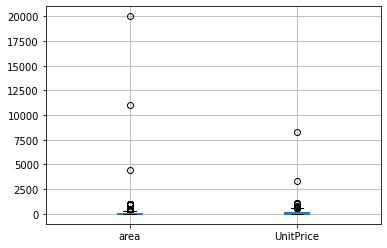

In [24]:
# Vẽ biểu đồ boxplot cho hai thuộc tính "area" và "UnitPrice"
df2.boxplot(column = ["area", "UnitPrice"])

In [25]:
# Tính toán Q1 & Q3
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)

In [26]:
# Tính IQR
IQR = Q3 - Q1

In [27]:
# Lọc dữ liệu ngoại lai
df_new = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis = 1)]

<AxesSubplot:>

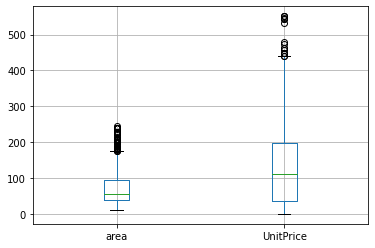

In [28]:
df_new.boxplot(column = ["area", "UnitPrice"])

In [29]:
df_new.describe()

,area,price,UnitPrice
count,785.000000,785.000000,785.000000
mean,76.630255,8719.180255,136.899479
std,52.305496,7745.636632,112.290900
min,10.000000,4.500000,0.122500
25%,40.000000,3300.000000,35.256410
50%,56.000000,5750.000000,111.386139
75%,94.000000,12000.000000,197.142857
max,246.000000,33000.000000,551.111111


In [30]:
df2.describe()

,area,price,UnitPrice
count,942.000000,9.420000e+02,942.000000
mean,143.206210,2.204619e+04,inf
std,762.228532,1.196544e+05,NaN
min,0.000000,4.500000e+00,0.122500
25%,42.000000,3.650000e+03,35.785714
50%,62.000000,7.000000e+03,117.028986
75%,125.000000,1.550000e+04,242.857143
max,20000.000000,3.300000e+06,inf


# 8. Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

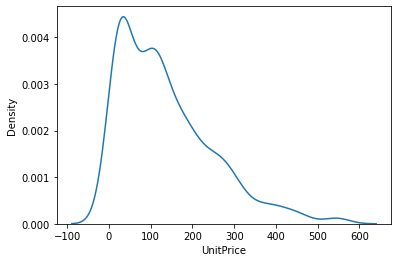

In [31]:
# Phân bố dữ liệu trên cột "UnitPrice"
sns.kdeplot(data = df_new.UnitPrice)

<AxesSubplot:ylabel='Density'>

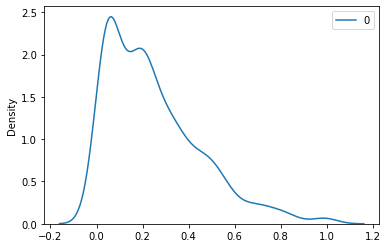

In [32]:
# Chuẩn hoá với MinMax Scaling
scaler = MinMaxScaler()

mms = scaler.fit_transform(pd.DataFrame(df_new.UnitPrice))

sns.kdeplot(data = mms)

<AxesSubplot:ylabel='Density'>

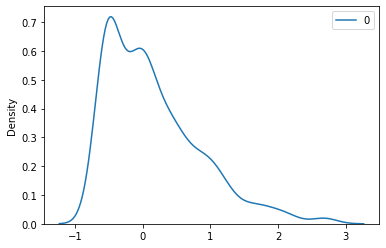

In [33]:
# Chuẩn hoá với RobustScaler
scaler = RobustScaler()

rbs = scaler.fit_transform(pd.DataFrame(df_new.UnitPrice))

sns.kdeplot(data = rbs)

<AxesSubplot:ylabel='Density'>

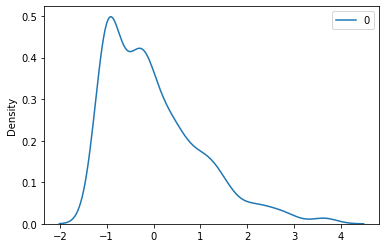

In [34]:
# Chuẩn hoá với Standard Scaling
scaler = StandardScaler()

sc = scaler.fit_transform(pd.DataFrame(df_new.UnitPrice))

sns.kdeplot(data = sc)